# GeoPandas Library Introduction

---

## Import the library and make a first example

In the next code space I just import the GeoPandas library and in the next code space you can find the first example on how to use GeoPandas.

In [24]:
# Importing the useful libraries

import geopandas as gpd
import pandas as pd
import folium
import geodatasets
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the shapefile of world countries
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

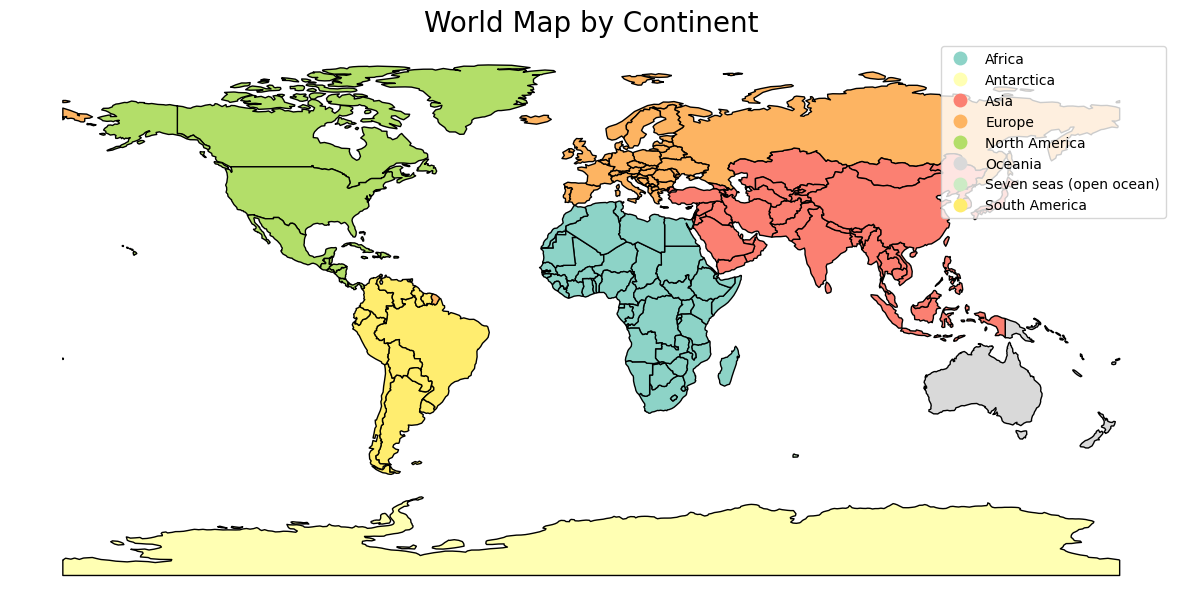

In [2]:
# Check the first rows to understand the data structure
print(world.head())

# Plot the world map, coloring countries by continent
fig, ax = plt.subplots(figsize=(15, 10))  # Create a figure and axis
world.plot(
    column="CONTINENT",  # Color by the 'CONTINENT' attribute
    cmap="Set3",         # Choose a colorful map style
    legend=True,         # Show a legend
    edgecolor="black",   # Color of country borders
    ax=ax                # Plot on the axis we created
)

# Set the title
ax.set_title("World Map by Continent", fontsize=20)

# Remove the axis ticks
ax.set_axis_off()

# Show the plot
plt.show()

Let's try to analyze Italy's shapefile next.

Index(['id', 'name', 'source', 'geometry'], dtype='object')


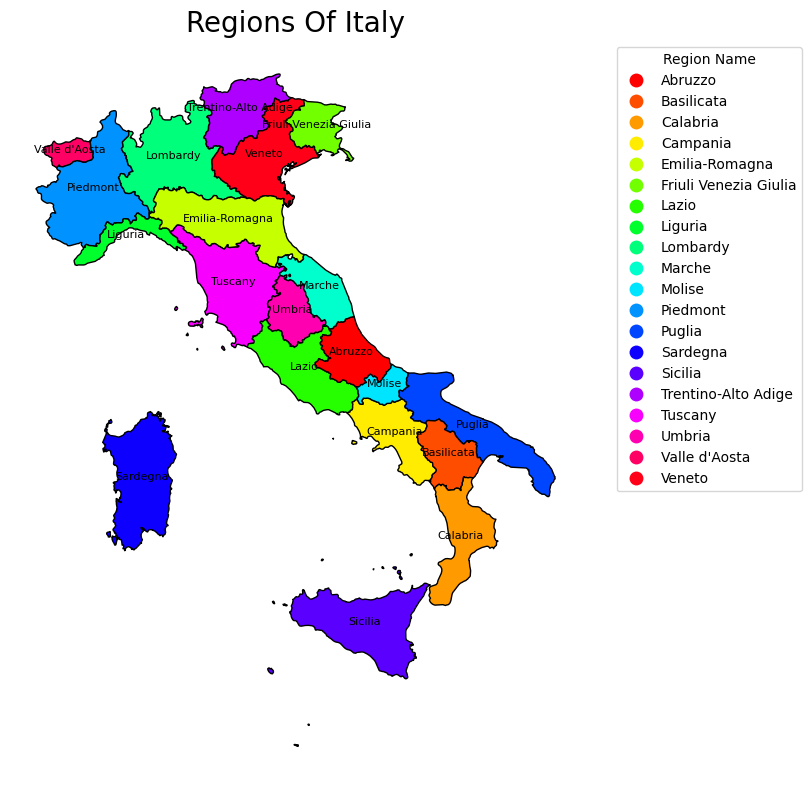

In [9]:
# Load The Shapefile Of Italian Regions
italy_area = gpd.read_file("data/italy/it.shp")

print(italy_area.columns)

# Create A Plot Figure And Axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot Regions Using Distinct Colors Based On Their Name
plot = italy_area.plot(
    column="name",         # Use Region Name For Coloring
    cmap="hsv",          # Use A Distinctive Color Map
    edgecolor="black",     # Region Borders In Black
    ax=ax,
    legend=True,           # Enable Legend
    legend_kwds={
        "bbox_to_anchor": (1.05, 1),   # Position legend outside the plot
        "loc": "upper left",           # Align it to the top-left corner outside
        "title": "Region Name",        # Legend title
    }
)

# Annotate Each Region With Its Name At The Centroid
for idx, row in italy_area.iterrows():
    if row.geometry.is_empty or row.geometry.centroid.is_empty:
        continue
    centroid = row.geometry.centroid
    ax.annotate(
        text=row["name"],
        xy=(centroid.x, centroid.y),
        ha="center",
        fontsize=8,
        color="black"
    )

# Set The Title Of The Map
ax.set_title("Regions Of Italy", fontsize=20)

# Hide Axis Ticks And Labels
ax.set_axis_off()

# Adjust Layout To Make Space For Legend
plt.tight_layout()

# Show The Final Map
plt.show()

Knowing what type of columns are in Italy's shapefile, we can make a plot showing the name of every region.

---

## Let's see other examples

## Test 1: Filter and Display Only European Countries

This test shows how to use attribute filtering in GeoPandas and plot only selected countries based on their continent.

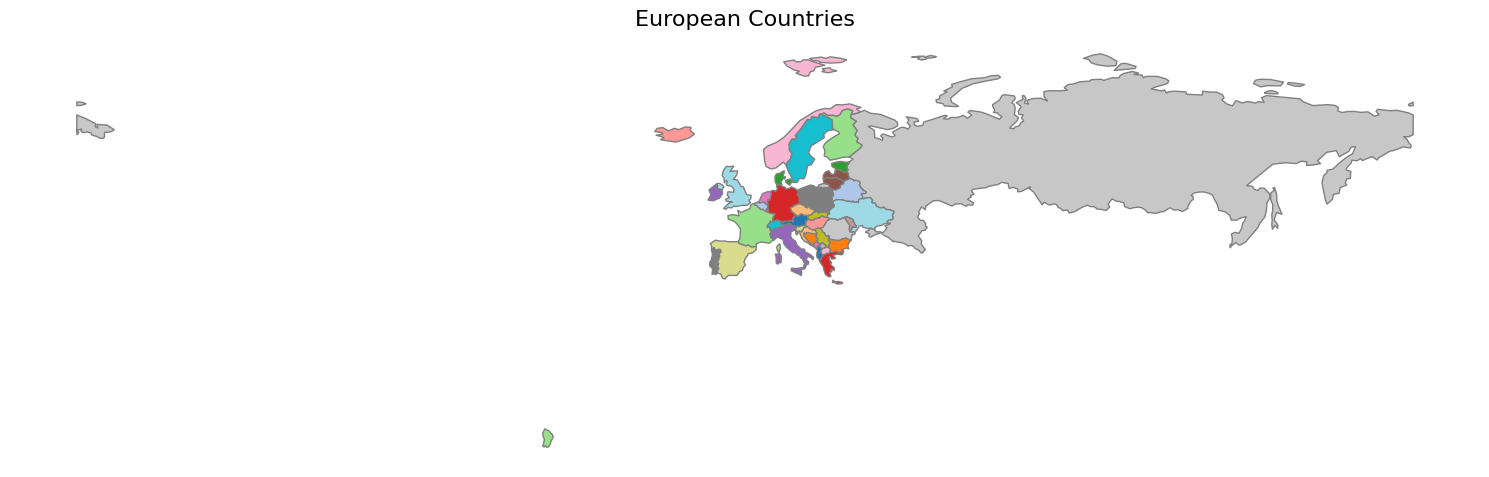

In [8]:
# Filter only European countries
europe = world[world["CONTINENT"] == "Europe"]

# Plot Europe
fig, ax = plt.subplots(figsize=(15, 15))
europe.plot(
    column="NAME",         # Color by country name
    cmap="tab20",          # Use a distinctive colormap
    legend=False,
    edgecolor="gray",
    ax=ax
)

# Add title
ax.set_title("European Countries", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

---

## Test 2: Area Calculation of Italian Regions
We compute the area of each Italian region and add it as a new column in the GeoDataFrame.

This showcases basic spatial operations.

In [10]:
# Project to a metric CRS (UTM zone 32N) for accurate area calculation
italy_area_projected = italy_area.to_crs(epsg=32632)

# Compute area in square kilometers
italy_area_projected["area_km2"] = italy_area_projected.geometry.area / 1e6

# Sort by area and display
print(italy_area_projected[["name", "area_km2"]].sort_values(by="area_km2", ascending=False))

                     name      area_km2
16                Sicilia  25981.743630
1                Piedmont  25496.136416
17               Sardegna  24095.108801
3                Lombardy  23961.336362
7                 Tuscany  22960.506375
18         Emilia-Romagna  22188.347656
11                 Puglia  19639.286621
5                  Veneto  18045.535751
9                   Lazio  17067.896975
15               Calabria  15259.998419
12               Campania  13582.190018
4     Trentino-Alto Adige  13517.162733
10                Abruzzo  10926.344122
14             Basilicata  10142.888743
19                 Marche   9790.228894
8                  Umbria   8509.910912
6   Friuli Venezia Giulia   7353.367785
2                 Liguria   5487.555088
13                 Molise   4545.728236
0           Valle d'Aosta   3302.725867


---

## Test 3: Interactive Map with Folium
Let's create an interactive map using Folium to visualize Italian regions with popups showing their names.

In [11]:
# Convert to WGS84 (EPSG:4326) for web mapping
italy_wgs84 = italy_area.to_crs(epsg=4326)

# Create folium map centered on Italy
m = folium.Map(location=[42.5, 12.5], zoom_start=5)

# Add regions to the map
folium.GeoJson(
    italy_wgs84,
    name="Italian Regions",
    tooltip=folium.GeoJsonTooltip(fields=["name"], aliases=["Region:"])
).add_to(m)

# Show the map
m

---

## Test 4: Find the Bounding Box of Italy
This test shows how to compute and display the bounding box of the geometry, a common spatial operation.

Bounding Box Coordinates:
Min Longitude: 6.602728312007087
Min Latitude: 35.48924388593867
Max Longitude: 18.517425977231024
Max Latitude: 47.08521495332304


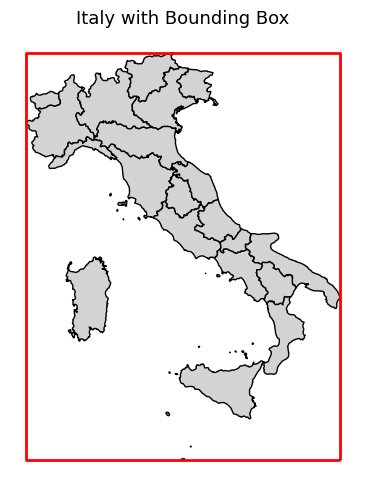

In [17]:
# Compute the bounding box of Italy
bbox = italy_area.total_bounds  # returns [minx, miny, maxx, maxy]

print("Bounding Box Coordinates:")
print(f"Min Longitude: {bbox[0]}")
print(f"Min Latitude: {bbox[1]}")
print(f"Max Longitude: {bbox[2]}")
print(f"Max Latitude: {bbox[3]}")

# Plot regions with bounding box
fig, ax = plt.subplots(figsize=(7, 5))
italy_area.plot(ax=ax, edgecolor="black", facecolor="lightgray")
ax.set_title("Italy with Bounding Box", fontsize=13)

# Draw the bounding box as a red rectangle
from shapely.geometry import box
bbox_geom = box(*bbox)
gpd.GeoSeries([bbox_geom], crs=italy_area.crs).boundary.plot(ax=ax, color="red", linewidth=2)

ax.set_axis_off()
plt.tight_layout()
plt.show()

---

## Test 5: Create Buffers Around Region Centroids
This test demonstrates how to generate circular buffer zones around the centroids of each region.

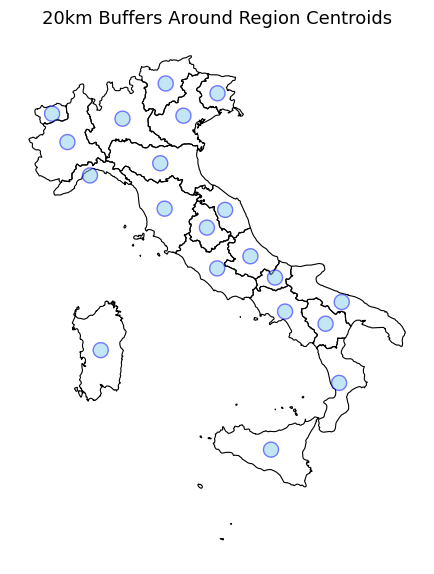

In [16]:
# Project to metric CRS for accurate buffer radius
italy_proj = italy_area.to_crs(epsg=32632)

# Calculate centroids and buffers (20 km radius)
centroids = italy_proj.geometry.centroid
buffers = centroids.buffer(20000)  # buffer size in meters

# Create GeoDataFrame for buffers
buffer_gdf = gpd.GeoDataFrame(geometry=buffers, crs=italy_proj.crs)

# Plot original regions and buffers
fig, ax = plt.subplots(figsize=(7, 6))
italy_proj.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.8)
buffer_gdf.plot(ax=ax, facecolor="skyblue", alpha=0.5, edgecolor="blue")

ax.set_title("20km Buffers Around Region Centroids", fontsize=13)
ax.set_axis_off()
plt.tight_layout()
plt.show()

---

## Test 6: Spatial Join Between Regions and Centroids
This test performs a spatial join between region centroids and their corresponding polygons, then plots them on a tile basemap using `contextily` for a realistic visualization.

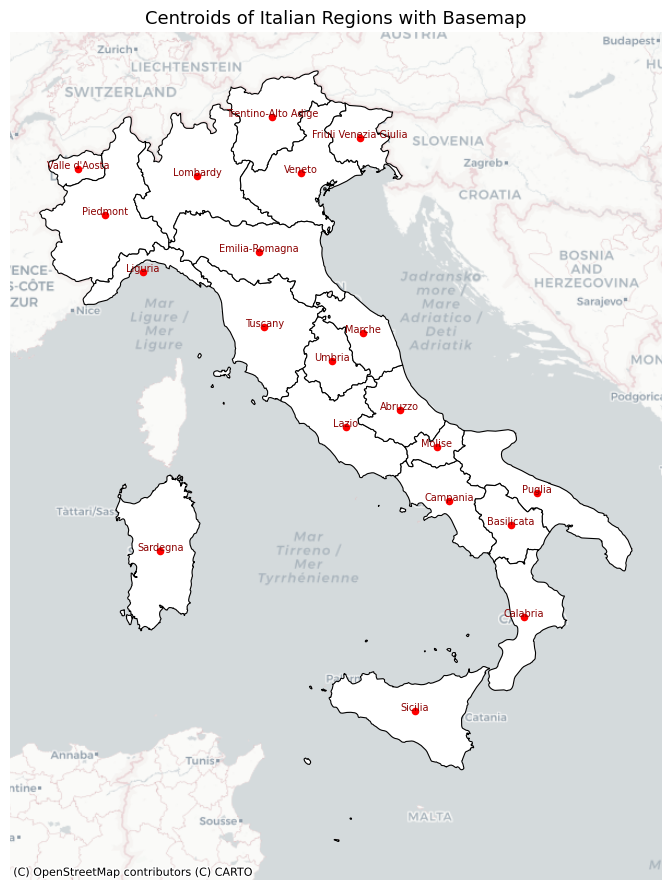

In [21]:
# Required import for basemap tiles
import contextily as ctx

# Reproject to Web Mercator (EPSG:3857) to work with basemaps
italy_web = italy_area.to_crs(epsg=3857)
centroids = italy_web.geometry.centroid

# Create GeoDataFrame of centroids
centroids_gdf = gpd.GeoDataFrame(italy_web[["name"]], geometry=centroids, crs=italy_web.crs)

# Spatial join (not strictly necessary here but shown for logic)
joined = gpd.sjoin(centroids_gdf, italy_web, how="left", predicate="within")

# Plot with contextily basemap
fig, ax = plt.subplots(figsize=(10, 9))

# Plot region boundaries
italy_web.plot(ax=ax, facecolor="white", edgecolor="black", linewidth=0.8)

# Plot centroids
centroids_gdf.plot(ax=ax, color="red", markersize=20)

# Annotate centroids with region names
for idx, row in centroids_gdf.iterrows():
    ax.annotate(
        row["name"],
        xy=(row.geometry.x, row.geometry.y),
        fontsize=7,
        ha="center",
        color="darkred"
    )

# Add basemap with contextily
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Final touches
ax.set_title("Centroids of Italian Regions with Basemap", fontsize=13)
ax.set_axis_off()
plt.tight_layout()
plt.show()

---

## Test 7: Spatial Join – Assigning Points to Italian Regions
This test shows how to assign points (e.g., offices, cities, POIs) to regions using a spatial join. This is fundamental in many real-world GIS workflows (e.g., associating clients to administrative areas).

        name_left name_right
0    Office Turin   Piedmont
1    Office Milan   Lombardy
2     Office Rome      Lazio
3   Office Naples   Campania
4  Office Palermo    Sicilia


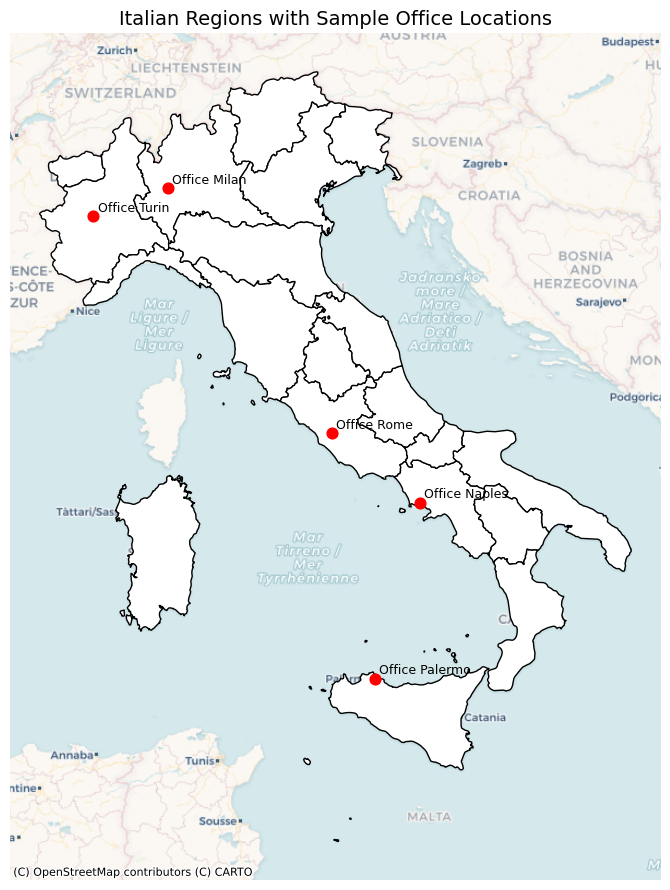

In [22]:
# Reproject Italy to a metric CRS for consistency
italy_web = italy_area.to_crs(epsg=3857)

# Create a sample list of points (longitude, latitude)
# We'll simulate some office locations
points_data = [
    {"name": "Office Turin", "coords": (7.6869, 45.0703)},
    {"name": "Office Milan", "coords": (9.1900, 45.4642)},
    {"name": "Office Rome", "coords": (12.4964, 41.9028)},
    {"name": "Office Naples", "coords": (14.2681, 40.8518)},
    {"name": "Office Palermo", "coords": (13.3615, 38.1157)},
]

# Convert to a GeoDataFrame
points_gdf = gpd.GeoDataFrame(
    points_data,
    geometry=[Point(xy) for xy in [x["coords"] for x in points_data]],
    crs="EPSG:4326"  # WGS84
).to_crs(epsg=3857)  # Match with Italy CRS

# Perform spatial join to find the region each point falls in
joined = gpd.sjoin(points_gdf, italy_web, how="left", predicate="within")

# Print results
print(joined[["name_left", "name_right"]])  # Point name and region name

# Plot result
fig, ax = plt.subplots(figsize=(11, 9))
italy_web.plot(ax=ax, facecolor="white", edgecolor="black")
joined.plot(ax=ax, color="red", markersize=60)

# Add labels for the offices
for _, row in joined.iterrows():
    ax.annotate(
        text=row["name_left"],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=9
    )

# Add title and basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, zoom=6)
ax.set_title("Italian Regions with Sample Office Locations", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

---
